In [216]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

arr = np.array(
    [
        [
            [1, 2, 1],
            [3, 1, 2],
        ],
        [
            [2, 1, 1],
            [1, 0, 3],
        ],
        [
            [3, 2, 1],
            [1, 0, 0],
        ],
    ]
)
print(arr, arr.shape)
print(arr.reshape(-1, 3))
df = pd.DataFrame(arr.reshape(-1, 3), columns=["red", "green", "blue"])
print(df)


[[[1 2 1]
  [3 1 2]]

 [[2 1 1]
  [1 0 3]]

 [[3 2 1]
  [1 0 0]]] (3, 2, 3)
[[1 2 1]
 [3 1 2]
 [2 1 1]
 [1 0 3]
 [3 2 1]
 [1 0 0]]
   red  green  blue
0    1      2     1
1    3      1     2
2    2      1     1
3    1      0     3
4    3      2     1
5    1      0     0


In [217]:
from ucimlrepo import fetch_ucirepo # type: ignore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler # type: ignore
from sklearn.cluster import KMeans # type: ignore
from sklearn.metrics import silhouette_score # type: ignore
import matplotlib.pyplot as plt # type: ignore

ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601) 
  
X = ai4i_2020_predictive_maintenance_dataset.data.features 
y = ai4i_2020_predictive_maintenance_dataset.data.targets 


In [218]:
categorical = X.select_dtypes(include=["object"]).columns
ord_enc = OrdinalEncoder()
X[categorical] = ord_enc.fit_transform(X[categorical])
X = X.drop(["Air temperature", "Process temperature"], axis=1)
print(X)
print(X.shape)

      Type  Rotational speed  Torque  Tool wear
0      2.0              1551    42.8          0
1      1.0              1408    46.3          3
2      1.0              1498    49.4          5
3      1.0              1433    39.5          7
4      1.0              1408    40.0          9
...    ...               ...     ...        ...
9995   2.0              1604    29.5         14
9996   0.0              1632    31.8         17
9997   2.0              1645    33.4         22
9998   0.0              1408    48.5         25
9999   2.0              1500    40.2         30

[10000 rows x 4 columns]
(10000, 4)


C:\Users\lnemt\AppData\Local\Temp\ipykernel_27848\2877384113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical] = ord_enc.fit_transform(X[categorical])


In [219]:
print(y[(y!=0).any(axis=1)])
y_targets = 5

      Machine failure  TWF  HDF  PWF  OSF  RNF
50                  1    0    0    1    0    0
69                  1    0    0    1    1    0
77                  1    1    0    0    0    0
160                 1    0    0    0    1    0
161                 1    0    0    0    1    0
...               ...  ...  ...  ...  ...  ...
9758                1    1    0    0    0    0
9764                1    0    0    1    0    0
9822                1    0    0    0    1    0
9830                1    0    0    0    1    0
9974                1    0    0    1    1    0

[357 rows x 6 columns]


In [220]:
mm_scaler = MinMaxScaler()
# mm_scaler = StandardScaler()
X_train = mm_scaler.fit_transform(X)
failure_X = X_train[y["Machine failure"] == 1]
X_osf = X_train[y["OSF"] == 1]
X_twf = X_train[y["TWF"] == 1]
X_hdf = X_train[y["HDF"] == 1]
X_pwf = X_train[y["PWF"] == 1]
X_rnf = X_train[y["RNF"] == 1]

X_no_f = X_train[y["Machine failure"] == 0]
print(X_train)
print(X_train.shape)

[[1.         0.22293364 0.53571429 0.        ]
 [0.5        0.13969732 0.58379121 0.01185771]
 [0.5        0.19208382 0.62637363 0.01976285]
 ...
 [1.         0.27764843 0.40659341 0.08695652]
 [0.         0.13969732 0.61401099 0.09881423]
 [1.         0.19324796 0.5        0.11857708]]
(10000, 4)


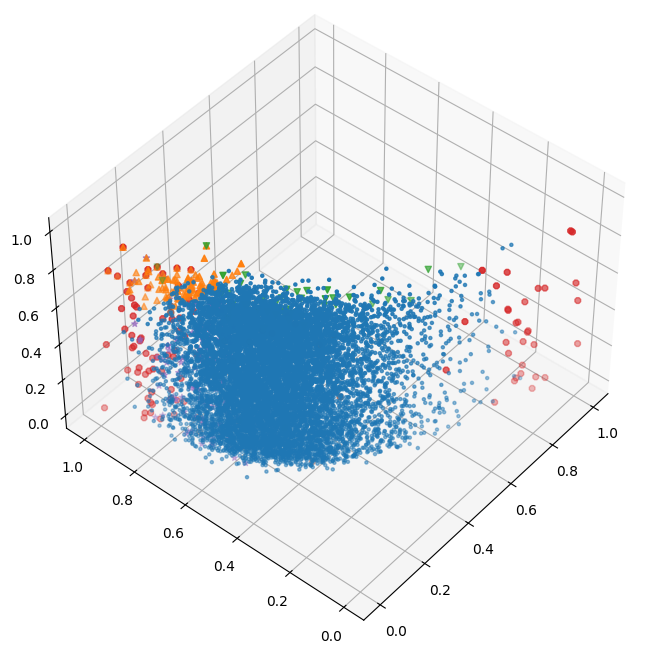

In [221]:
fir, sec, third = 1, 2, 3

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

# fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(X_no_f[:, fir], X_no_f[:, sec], X_no_f[:, third], marker=".")
# ax.scatter(failure_X[:, fir], failure_X[:, sec], marker="X")
ax.scatter(X_osf[:, fir], X_osf[:, sec], X_osf[:, third], marker="^")
ax.scatter(X_twf[:, fir], X_twf[:, sec], X_twf[:, third], marker="v")
ax.scatter(X_pwf[:, fir], X_pwf[:, sec], X_pwf[:, third], marker="8")
ax.scatter(X_hdf[:, fir], X_hdf[:, sec], X_hdf[:, third], marker="*")
ax.scatter(X_rnf[:, fir], X_rnf[:, sec], X_rnf[:, third], marker="o")
ax.view_init(45, -140)
plt.show()

In [239]:
# kmeans = KMeans(n_clusters=y_targets+2)
kmeans = KMeans(n_clusters=y_targets)
y_pred = kmeans.fit_predict(X_train)
print(y_pred, len(np.unique(y_pred)), y_pred.shape)
print(kmeans.inertia_, "\n", silhouette_score(X_train, kmeans.labels_))

[1 2 2 ... 1 4 1] 5 (10000,)
502.8603319605386 
 0.42204042501711647
